# Good Bill Hunting:
NLP Capstone Project

# Goal:
Construct a ML NLP model that predicts the political party of a congressional bill using the text from a bill.

Find any key language or words that would determine the political party of a congressional bill.

Deliver a report that explains what steps were taken, why and what the outcome was.

Make recommendations on what works or doesn't work in predicting the political party of a congressional bill.

# Imports

In [1]:
# standard DS imports
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# NLP imports
from bs4 import BeautifulSoup
import requests

# custom imports
from env import api_key
import json
from acquire import *
from prepare import *
from explore import *
from modeling import *

# filter out any noisy warning flags
import warnings
warnings.filterwarnings('ignore')

# Acquire
- Data acquired from api.govinfo.gov/
- It contained 26,533 rows and 3 columns before cleaning.
- Each row represents a Congressional Bill.
- Each column represents the sponsor, political party, and text of the bill.

In [2]:
# acquire step
links = get_links_to_bills()
df = acquire_bills(links, filename="master_df.csv")

# Prepare:
- Use regex to clean our bill text.
- Lemmatize the cleaned bill text.
- Eliminate the sponsor of the bill.
- Split data into Train, Validate, Test

In [3]:
# creating a lemmatized column and cleaning the df
df = prepare_bills_for_processing(df)

In [4]:
# splitting the data
train, X_train, y_train, X_val, y_val, X_test, y_test = split_data(df, 'party')

# Data Dictionary

| Feature | Definition |
|:--------|:-----------|
|congressional bill| legislative proposals from the House of Representatives and Senate within the United States Congress. More info: https://www.govinfo.gov/help/bills#:~:text=A%20bill%20is%20a%20legislative,(first%20and%20second%20sessions). |
|political party| Made up of individuals who organize to win elections, operate government, and influence public policy. The Democratic and Republican parties are currently the primary parties in Congress. More info: https://www.senate.gov/reference/reference_index_subjects/Political_Parties_vrd.html |
|sponsor| Patron, usually a legislator, who presents a bill or resolution to a legislature for consideration. |
|initial cosponsor or original cosponsor| Senator or representative who was listed as a cosponsor at the time of a bill's introduction|

# A brief look at the data

In [5]:
# looking at the cleaned up columns
train.head()

,sponsor,party,bill_text,lem,model
25840,"Frelinghuysen, Rodney P.",R,\n\n\n \n To suspend temporarily the duty...,"[suspend, temporarily, duty, 3amino12propanedi...",suspend temporarily duty 3amino12propanediol e...
24423,"Foxx, Virginia",R,\n\n\n \n Of inquiry requesting the President...,"[inquiry, requesting, president, directing, se...",inquiry requesting president directing secreta...
16270,"Scott, Rick",R,\n\n\n \n To allow National Flood Insurance Pr...,"[allow, national, flood, insurance, program, p...",allow national flood insurance program policyh...
21136,"Hickenlooper, John W.",D,\n\n\n \n To provide better access to retireme...,"[provide, better, access, retirement, plan, sm...",provide better access retirement plan small bu...
11697,"Dingell, Debbie",D,\n\n\n \n To amend the Energy Policy and C...,"[amend, energy, policy, conservation, act, mod...",amend energy policy conservation act modify de...


# Explore
Questions asked:

1) Are there any words unique to a specific political party in determing Congressional Bills?

2) What are the top focus areas for each political party and are there any bi-partisan areas or Congressional Bills?

In [6]:
# creating word_freq df
word_freq = word_freq_new_df(train, clean_text)
word_freq.head()

,bills,demo,repub,ind
procedure,9938,7305,2613,20
issue,9880,7581,2284,14
month,9869,7418,2379,71
total,9839,7506,2281,45
unit,9830,7666,2109,54


# 1) Are there any words unique to a specific political party in determing Congressional Bills?

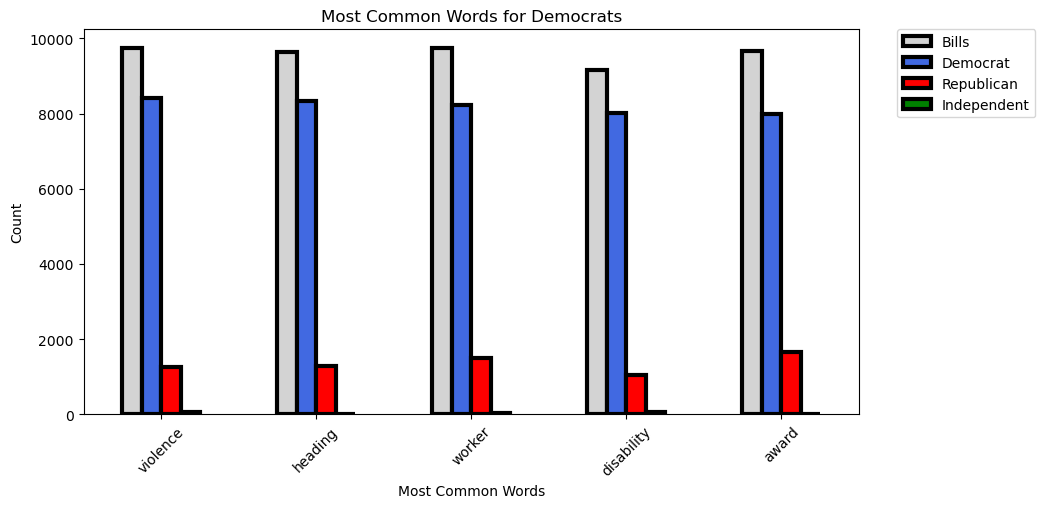

In [7]:
# visualization showing the most common words for democrats
democrat = demo_vis(word_freq)

- Democrat top words = violence, heading, worker, disability, award

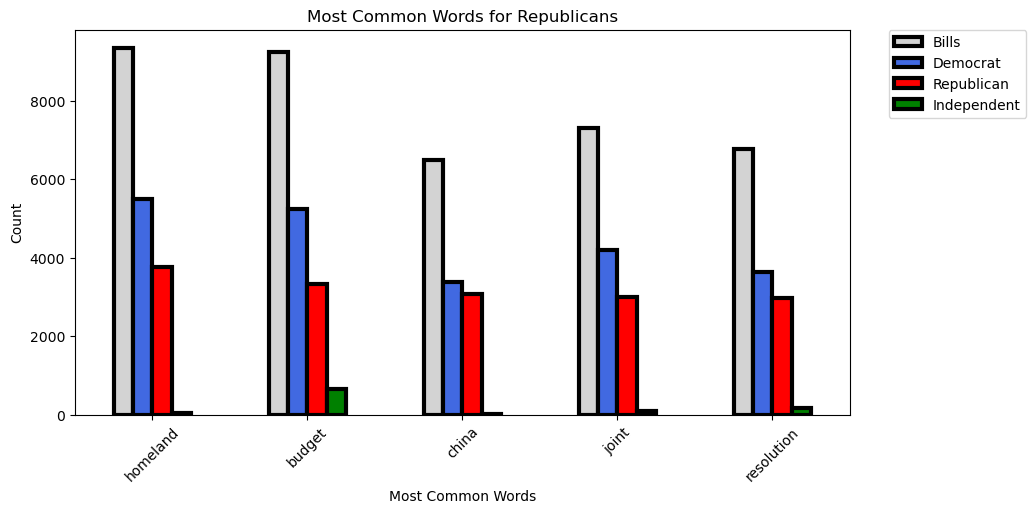

In [8]:
# visualization showing the most common words for republicans
republican = repub_vis(word_freq)

- Republican top words = homeland, budget, china, joint, resolution

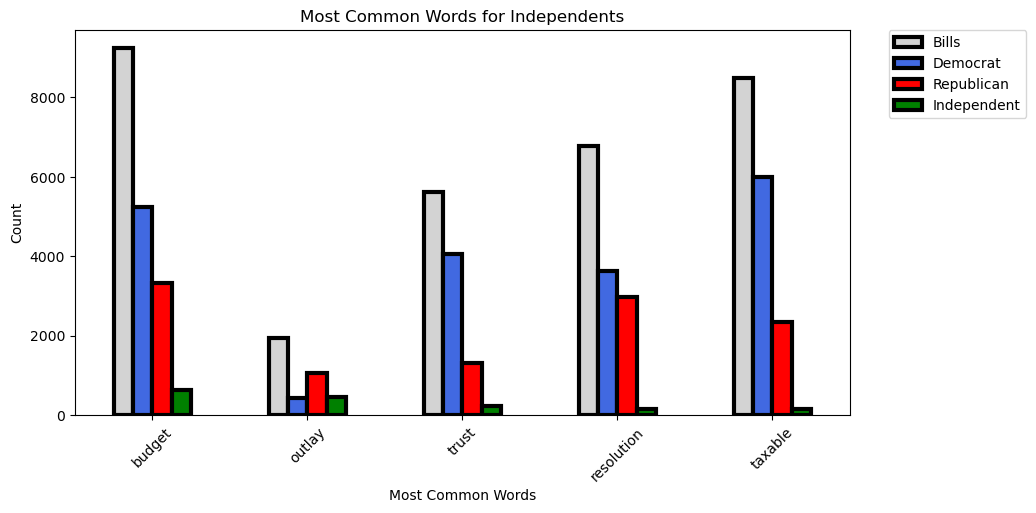

In [9]:
# visualization showing the most common words for independets
independent = ind_vis(word_freq)

- Independent top words = budget, outlay, trust, resolution, taxable


### Takeaways: ### 

- Budget appears as a top word for both republican and independent.
- Most if not all of the top words for independents appear to be related to economic subjects.
- China is a key concern for republicans.
- The overall bills appear to be related to the bill process versus any specific area.
- The top five words for each political party and the overall words for bills are mostly uniformly distributed.


# 2) What are the top focus areas for each political party and are there any bi-partisan areas or Congressional Bills?

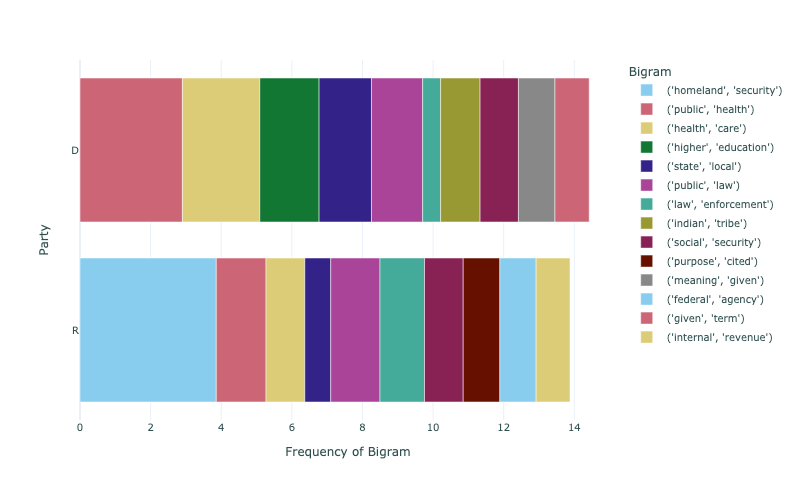

,bigram,frequency,party,scaled_freq
10,"(homeland, security)",7261,R,3.859656
0,"(public, health)",18007,D,2.899877


In [10]:
# visualization showing the top bigrams
top_bigrams = top_bigrams_viz(df)
top_bigrams

- Democrat top bigrams = (public, health), (health, care), (higher, education)
- Republican top bigrams = (homeland, security), (public, health), (health, care)

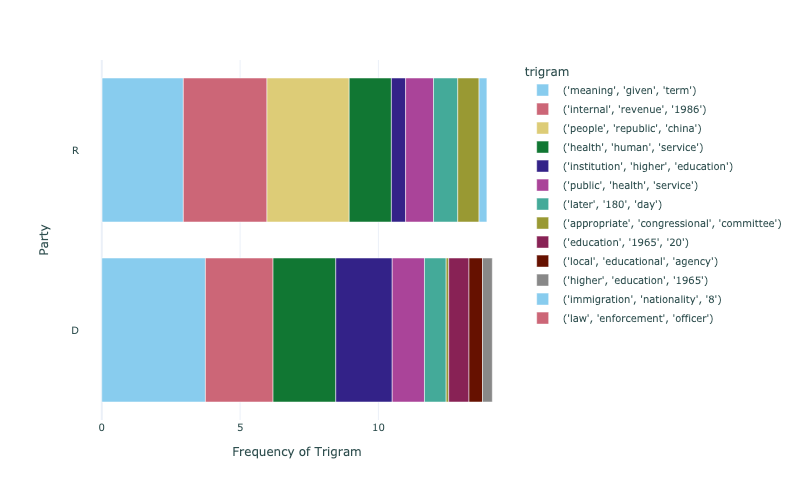

In [11]:
# visualization showing the top trigrams
top_trigrams = top_trigram_viz(df)
top_trigrams

- Republican top trigrams = (meaning, given, term), (internal, revenue, 1986), (people, republic, china)
- Democrat top trigrams = (meaning, given, term), (internal, revenue, 1986), (health, human, service)

### Takeaways: ###

- The internal revenue act of 1986 is either a major concern for all parties or an extremely large bill that is overwhelming the other bills.
- Term limits are another top area for both republicans and democrats.
- Health care is also a major area for democrats and in the top five for republicans.
- China appears again in trigrams for republicans.
- After the top three trigrams for republicans there is a drop off for the next trigram concerning health care.

# Exploration Summary
- Each political party had a focus area of concentration: for democrats the main are appears to be healthcare and higher education, republicans are focused on homeland security and China, and independents tend to lean toward economic concerns.
- The large amount of bills by democrats versus the other political parties may be obscuring the data from the other parties.
- Common areas of concern appear to be health care and term limits, at least for democrats and republicans.
- Although specific words may not necessarilly determine if a bill is a certain political party, there are some words that are associated with particualar political interests that could determine if a bill is from a particular political party.

# Modeling
- The accuracy will be the baseline we use for this project.
- We will be evaluating models developed using five different model types and various hyperparameter configurations.
- Models will be evaluated on train and validate data.
- The model that performs the best will then be evaluated on test data.
***The logistic regression model produced the best results.**

# Model Accuracies

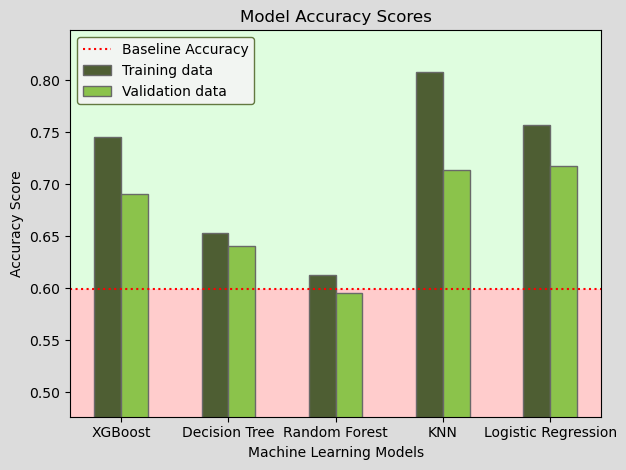

In [12]:
# visualization comparing the top five models
X_train, X_val, X_test = vectorize_data(X_train, X_val, X_test, target_col = 'model')
model_scores = find_model_scores(X_train, y_train, X_val, y_val)
model_scores

- All models except random forest performed better than the baseline on train and validate.

# Comparing Models
- The Linear Regression, Tweedie, and Polynomial models all performed better than the baseline.
- The Logistic Regression model performed the best on train and validate of all the models.
- We have chosen to move forward with the Logistic Regression model because KNN may be overfit and the regression model still outperformed the other top models.

# Linear Regression on Test

                 Model  Accuracy on Train  Accuracy on Validate  \
0  Logistic Regression             0.7568                0.7178   

   Accuracy on Test  
0            0.7119  


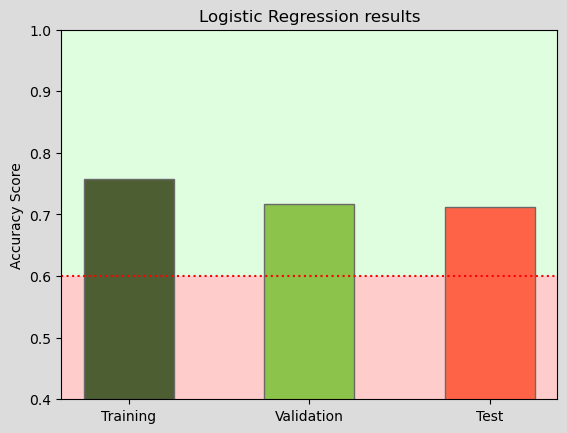

<Figure size 600x600 with 0 Axes>

In [13]:
# calling the function for the Logistic Regression test model
final = final_test(X_train, y_train, X_val, y_val, X_test, y_test)
final

# Modeling Summary
- Four of the five models performed better than the baseline on train and validate.
- A logistic regression model was selected as the final model and had a better accuracy score than the baseline.

# Conclusions

## Exploration
- Specific words that could be interpreted as partisan or devisive could not be determined, but certain policy areas or political agendas can be inferred from the individual words, bigrams, and trigrams.

- Certain bills may be large enough to alter the data being analyzed, but further investigation into certain bills could provide additional clarification.

- There are a few bills/areas that appear to be imortant for both parties, such as health care.

## Modeling
- ***The final model outperformed the baseline. Possible reasons include:***

- The difference in the amount of bills proposed by democrats versus republicans could be a reason for the models success, however, the extensive amount of data and the in-depth exploration of parameters on modeling are certainly indicators for the models accuracy.

# Recommendations
- The reults from this project should be made public for informational use on the focus of democratic and republican representatives.
- An investigation or inquiry should be established to determine why there is an imbalance of bills proposed between the two major political parties.

# Next Steps
- This project can be used as a starting point for a larger project on time series where a team can add other NLP bills throughout history and future bills to analyze the change in political areas of concenration over time.
- Investigate which bills have made it through the process and are now laws and build a model that would predict, based off of the language, whether a bill is made into law or not.
- Remove the dates from the bills and make another column to sort by the dates in order to determine if there is any change or difference in language between certain timeframes or major events.